In [1]:
import pandas as pd #for data handling
pd.options.display.max_rows = 999 #set the max no of rows you can see. 
pd.set_option('display.max_columns', 999) #another way to do the same thing

import seaborn as sns 
import numpy as np #for matrix operation
import matplotlib.pyplot as plt 

In [58]:
trip_df = pd.read_csv("Downloads/bikes_data_only/data/trip_data.csv")

# EDA

In [11]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


In [18]:
trip_df.describe()

,Trip ID,Start Station,End Station
count,354152.000000,354152.000000,354152.000000
mean,676962.274416,59.755159,59.714665
std,138874.153513,17.891604,18.034273
min,432947.000000,2.000000,2.000000
25%,557009.750000,51.000000,50.000000
50%,679451.500000,63.000000,63.000000
75%,798026.250000,71.000000,70.000000
max,913460.000000,90.000000,90.000000


In [12]:
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


In [13]:
len(trip_df['Trip ID'].unique())

354152

## Above shows that each row belongs to unique trip id. The data shows the start date , statation and end date, station of a single trip

In [52]:
trip_df.isnull().sum().sort_values(ascending=False)

Subscriber Type    0
End Station        0
End Date           0
Start Station      0
Start Date         0
Trip ID            0
dtype: int64

In [14]:
station_df = pd.read_csv("Downloads/bikes_data_only/data/station_data.csv")

In [15]:
station_df.head()

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


In [111]:
station_df['City'].value_counts()

San Francisco    39
San Jose         16
Redwood City      9
Mountain View     7
Palo Alto         5
Name: City, dtype: int64

## Above is the station data. It just shows which station id belongs to what station name and also the dock count

In [50]:
station_df.isnull().sum().sort_values(ascending=False)

City          0
Dock Count    0
Long          0
Lat           0
Name          0
Id            0
dtype: int64

In [39]:
weather_df = pd.read_csv("Downloads/bikes_data_only/data/weather_data.csv")

In [40]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,29.82,29.76,10.0,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,29.82,29.79,10.0,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,29.76,29.72,10.0,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,29.76,29.72,10.0,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,29.87,29.81,10.0,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


In [41]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
Date                         1825 non-null object
Max TemperatureF             1821 non-null float64
Mean TemperatureF            1821 non-null float64
Min TemperatureF             1821 non-null float64
Max Dew PointF               1775 non-null float64
MeanDew PointF               1775 non-null float64
Min DewpointF                1775 non-null float64
Max Humidity                 1775 non-null float64
Mean Humidity                1775 non-null float64
Min Humidity                 1775 non-null float64
Max Sea Level PressureIn     1824 non-null float64
Mean Sea Level PressureIn    1824 non-null float64
Min Sea Level PressureIn     1824 non-null float64
Max VisibilityMiles          1820 non-null float64
Mean VisibilityMiles         1820 non-null float64
Min VisibilityMiles          1820 non-null float64
Max Wind SpeedMPH            1824 non-null float64
Mean Wind SpeedMPH         

In [42]:
weather_df.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
count,1821.000000,1821.000000,1821.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1824.000000,1824.000000,1824.000000,1820.000000,1820.000000,1820.000000,1824.000000,1824.000000,1284.000000,1824.000000,1824.000000,1824.000000,1825.000000
mean,70.637013,61.837452,52.733663,54.460845,50.397183,46.135775,87.505915,69.282817,48.769014,30.070641,30.017144,29.962659,10.475275,9.636813,7.948901,16.347588,6.150219,21.690810,0.025032,3.110746,260.584430,94325.000000
std,8.260028,6.893216,7.037803,6.330125,7.101097,8.548960,8.537459,10.408295,14.274316,0.135416,0.131222,0.132534,2.083719,1.433697,2.993878,8.592296,3.238621,6.052399,0.177212,2.297131,95.985517,404.670892
min,50.000000,41.000000,30.000000,20.000000,13.000000,4.000000,25.000000,25.000000,4.000000,29.670000,29.630000,29.340000,5.000000,4.000000,0.000000,4.000000,0.000000,7.000000,0.000000,0.000000,0.000000,94041.000000
25%,64.000000,57.000000,48.000000,50.000000,47.000000,41.000000,83.000000,64.000000,40.000000,29.970000,29.920000,29.870000,10.000000,10.000000,6.000000,12.000000,4.000000,18.000000,0.000000,1.000000,242.000000,94063.000000
50%,70.000000,61.000000,53.000000,55.000000,51.000000,48.000000,88.000000,70.000000,50.000000,30.050000,30.000000,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,0.000000,3.000000,295.000000,94107.000000
75%,76.000000,67.000000,58.000000,59.000000,56.000000,53.000000,93.000000,75.000000,57.000000,30.170000,30.110000,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,0.000000,5.000000,328.000000,94301.000000
max,102.000000,82.000000,75.000000,68.000000,64.000000,63.000000,100.000000,96.000000,86.000000,30.480000,30.410000,30.360000,20.000000,20.000000,20.000000,128.000000,23.000000,62.000000,3.360000,8.000000,360.000000,95113.000000


## Above data shows the date wise weather Dew and humidity points have few missing values

In [43]:
weather_df.isnull().sum().sort_values(ascending=False)

Events                       1538
Max Gust SpeedMPH             541
Min Humidity                   50
Max Dew PointF                 50
MeanDew PointF                 50
Min DewpointF                  50
Max Humidity                   50
Mean Humidity                  50
Min VisibilityMiles             5
Mean VisibilityMiles            5
Max VisibilityMiles             5
Mean TemperatureF               4
Min TemperatureF                4
Max TemperatureF                4
Mean Sea Level PressureIn       1
Max Sea Level PressureIn        1
WindDirDegrees                  1
Max Wind SpeedMPH               1
Mean Wind SpeedMPH              1
PrecipitationIn                 1
CloudCover                      1
Min Sea Level PressureIn        1
Zip                             0
Date                            0
dtype: int64

In [35]:
total = weather_df.isnull().sum().sort_values(ascending=False)
percent_1 = weather_df.isnull().sum()/weather_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Events,1538,84.3
Max Gust SpeedMPH,541,29.6
Min Humidity,50,2.7
Max Dew PointF,50,2.7
MeanDew PointF,50,2.7


In [44]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,29.82,29.76,10.0,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,29.82,29.79,10.0,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,29.76,29.72,10.0,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,29.76,29.72,10.0,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,29.87,29.81,10.0,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


In [45]:
weather_df = weather_df.drop('Events', 1)
weather_df = weather_df.drop('Max Gust SpeedMPH', 1)

In [46]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,29.82,29.76,10.0,10.0,8.0,16.0,7.0,0.0,0.0,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,29.82,29.79,10.0,10.0,7.0,21.0,8.0,0.0,5.0,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,29.76,29.72,10.0,10.0,10.0,21.0,8.0,0.0,4.0,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,29.76,29.72,10.0,10.0,8.0,22.0,8.0,0.0,5.0,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,29.87,29.81,10.0,9.0,7.0,18.0,8.0,0.0,4.0,309.0,94107


In [47]:
weather_df.fillna(weather_df.mean(), inplace=True)

### As the Events and Max gust feature has more than 25% missing values, we will drop those columns and impute missing values of min humidity max dew and meandew and rest with their mean

In [48]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,29.82,29.76,10.0,10.0,8.0,16.0,7.0,0.0,0.0,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,29.82,29.79,10.0,10.0,7.0,21.0,8.0,0.0,5.0,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,29.76,29.72,10.0,10.0,10.0,21.0,8.0,0.0,4.0,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,29.76,29.72,10.0,10.0,8.0,22.0,8.0,0.0,5.0,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,29.87,29.81,10.0,9.0,7.0,18.0,8.0,0.0,4.0,309.0,94107


In [49]:
weather_df.isnull().sum().sort_values(ascending=False)

Zip                          0
WindDirDegrees               0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Date                         0
dtype: int64

### Now joining all the tables to create the train dataset

### Extracting the hour and date part from the start date and end date columns, so that daily and hourly aggregations can be done. This is useful because we need to predict the hourly trips for each station, date is important because we need to fetch the weather data and join them. Reason is we want to create a train dataset which has stationid, hour and the weather details of that station id with the net rate of the bikes (End trips - Start trips). Below , we are trying to achieve this  

In [ ]:
trip_df['Start_Hour'] = trip_df['Start Date'].str[11:13] ### Taking only the hour part of the Start Date column

In [60]:
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Start_Hour
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,23
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber,23
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber,23
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber,23
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer,23


In [63]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 7 columns):
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
Start_Hour         354152 non-null int64
dtypes: int64(4), object(3)
memory usage: 18.9+ MB


In [62]:
trip_df['Start_Hour'] = trip_df['Start_Hour'].astype('|S').astype(int) ## Converting to int

In [64]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 7 columns):
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
Start_Hour         354152 non-null int64
dtypes: int64(4), object(3)
memory usage: 18.9+ MB


In [66]:
trip_df['End_Hour'] = trip_df['End Date'].str[11:13]

In [67]:
trip_df['End_Hour'] = trip_df['End_Hour'].astype('|S').astype(int) ## Converting to int

In [68]:
trip_df['Start_Date'] = trip_df['Start Date'].str[0:10]

In [69]:
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Start_Hour,End_Hour,Start_Date
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,23,23,31/08/2015
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber,23,23,31/08/2015
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber,23,23,31/08/2015
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber,23,23,31/08/2015
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer,23,23,31/08/2015


In [70]:
trip_df['End_Date'] = trip_df['End Date'].str[0:10]

In [71]:
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Start_Hour,End_Hour,Start_Date,End_Date
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,23,23,31/08/2015,31/08/2015
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber,23,23,31/08/2015,31/08/2015
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber,23,23,31/08/2015,31/08/2015
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber,23,23,31/08/2015,31/08/2015
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer,23,23,31/08/2015,31/08/2015


#### As we have already extracted date and hour from the Start date and end date, we dont need those columns so dropping them

In [72]:
trip_df = trip_df.drop('End Date', 1) 
trip_df = trip_df.drop('Start Date', 1)

In [73]:
trip_df.head()

,Trip ID,Start Station,End Station,Subscriber Type,Start_Hour,End_Hour,Start_Date,End_Date
0,913460,50,70,Subscriber,23,23,31/08/2015,31/08/2015
1,913459,31,27,Subscriber,23,23,31/08/2015,31/08/2015
2,913455,47,64,Subscriber,23,23,31/08/2015,31/08/2015
3,913454,10,8,Subscriber,23,23,31/08/2015,31/08/2015
4,913453,51,60,Customer,23,23,31/08/2015,31/08/2015


### Now grouping by start station, date and hour for calculation of count of trips and likewise calculating end trips for end station and then joining them by station, date and hour so that we know how many trips started and ended at a particular date and hour on a station and then we will subtract the end trips count and start trips count to get the net rate

In [97]:
start_trip_count = trip_df.groupby(['Start Station','Start_Date','Start_Hour']).agg({'Trip ID':'count'}).reset_index().rename(columns={'Trip ID':'Start_Trip_Count'})

In [98]:
start_trip_count.head()

,Start Station,Start_Date,Start_Hour,Start_Trip_Count
0,2,01/01/2015,13,1
1,2,01/01/2015,21,1
2,2,01/02/2015,20,1
3,2,01/03/2015,1,1
4,2,01/03/2015,12,1


In [99]:
end_trip_count = trip_df.groupby(['End Station','End_Date','End_Hour']).agg({'Trip ID':'count'}).reset_index().rename(columns={'Trip ID':'End_Trip_Count'})

In [100]:
end_trip_count.head()

,End Station,End_Date,End_Hour,End_Trip_Count
0,2,01/01/2015,13,1
1,2,01/01/2015,22,1
2,2,01/02/2015,1,1
3,2,01/02/2015,11,1
4,2,01/03/2015,18,1


In [101]:
start_end_count = pd.merge(start_trip_count, end_trip_count, left_on = ['Start Station', 'Start_Date', 'Start_Hour'], right_on = ['End Station', 'End_Date','End_Hour'])

In [102]:
start_end_count.head()

,Start Station,Start_Date,Start_Hour,Start_Trip_Count,End Station,End_Date,End_Hour,End_Trip_Count
0,2,01/01/2015,13,1,2,01/01/2015,13,1
1,2,01/04/2015,6,1,2,01/04/2015,6,5
2,2,01/04/2015,7,2,2,01/04/2015,7,5
3,2,01/04/2015,17,4,2,01/04/2015,17,3
4,2,01/04/2015,18,3,2,01/04/2015,18,1


In [103]:
start_end_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83024 entries, 0 to 83023
Data columns (total 8 columns):
Start Station       83024 non-null int64
Start_Date          83024 non-null object
Start_Hour          83024 non-null int64
Start_Trip_Count    83024 non-null int64
End Station         83024 non-null int64
End_Date            83024 non-null object
End_Hour            83024 non-null int64
End_Trip_Count      83024 non-null int64
dtypes: int64(6), object(2)
memory usage: 5.7+ MB


In [104]:
start_end_count['net_rate'] = start_end_count['End_Trip_Count'] - start_end_count['Start_Trip_Count']

In [105]:
start_end_count.head()

,Start Station,Start_Date,Start_Hour,Start_Trip_Count,End Station,End_Date,End_Hour,End_Trip_Count,net_rate
0,2,01/01/2015,13,1,2,01/01/2015,13,1,0
1,2,01/04/2015,6,1,2,01/04/2015,6,5,4
2,2,01/04/2015,7,2,2,01/04/2015,7,5,3
3,2,01/04/2015,17,4,2,01/04/2015,17,3,-1
4,2,01/04/2015,18,3,2,01/04/2015,18,1,-2


In [110]:
weather_df["Zip"].value_counts()

94107    365
94063    365
94041    365
95113    365
94301    365
Name: Zip, dtype: int64

### Took the zip codes and city from the internet and created a dictionary of them

In [ ]:
dict_zip_city = { 94107:'San Francisco',94063: 'Redwood City', 94041:'Mountain View', 95113:'San Jose,',94301:'Palo Alto' }

#### Replacing the zip codes to city so that joins can be easier

In [117]:
weather_df = weather_df.replace({"Zip": dict_zip_city}).rename(columns={'Zip':'City'})

In [123]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,City
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,29.82,29.76,10.0,10.0,8.0,16.0,7.0,0.0,0.0,290.0,San Francisco
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,29.82,29.79,10.0,10.0,7.0,21.0,8.0,0.0,5.0,290.0,San Francisco
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,29.76,29.72,10.0,10.0,10.0,21.0,8.0,0.0,4.0,276.0,San Francisco
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,29.76,29.72,10.0,10.0,8.0,22.0,8.0,0.0,5.0,301.0,San Francisco
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,29.87,29.81,10.0,9.0,7.0,18.0,8.0,0.0,4.0,309.0,San Francisco


#### Joining the trip data and the station data , joining is done by station id

In [120]:
trip_Station_df = pd.merge(start_end_count[['Start Station','Start_Date','Start_Hour',
                                            'net_rate']], station_df[['Id','City']], left_on = 'Start Station', 
                           right_on = 'Id')

In [121]:
trip_Station_df.head()

,Start Station,Start_Date,Start_Hour,net_rate,Id,City
0,2,01/01/2015,13,0,2,San Jose
1,2,01/04/2015,6,4,2,San Jose
2,2,01/04/2015,7,3,2,San Jose
3,2,01/04/2015,17,-1,2,San Jose
4,2,01/04/2015,18,-2,2,San Jose


### Joining the above joined data with the weather data (We are assuming the hourly weather as same as the day's weather due to lack of weather data for hours )

In [124]:
trip_weather_df = pd.merge(trip_Station_df[['Start Station','Start_Date','Start_Hour','net_rate','City']], weather_df, left_on=['Start_Date','City'], right_on=['Date','City'])

In [125]:
trip_weather_df.head()

,Start Station,Start_Date,Start_Hour,net_rate,City,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
0,21,02/10/2014,13,0,Redwood City,02/10/2014,89.0,72.0,55.0,54.0,43.0,36.0,82.0,43.0,16.0,30.05,29.99,29.87,10.0,10.0,10.0,6.0,1.0,0.0,0.0,314.0
1,24,02/10/2014,13,0,Redwood City,02/10/2014,89.0,72.0,55.0,54.0,43.0,36.0,82.0,43.0,16.0,30.05,29.99,29.87,10.0,10.0,10.0,6.0,1.0,0.0,0.0,314.0
2,21,07/03/2015,15,0,Redwood City,07/03/2015,75.0,60.0,46.0,50.0,43.0,37.0,82.0,65.0,31.0,30.16,30.10,30.01,10.0,10.0,10.0,8.0,1.0,0.0,0.0,5.0
3,22,07/03/2015,9,0,Redwood City,07/03/2015,75.0,60.0,46.0,50.0,43.0,37.0,82.0,65.0,31.0,30.16,30.10,30.01,10.0,10.0,10.0,8.0,1.0,0.0,0.0,5.0
4,21,10/06/2015,19,0,Redwood City,10/06/2015,68.0,65.0,62.0,66.0,62.0,57.0,94.0,86.0,78.0,29.95,29.92,29.89,10.0,10.0,6.0,10.0,3.0,0.0,8.0,15.0


In [126]:
trip_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79589 entries, 0 to 79588
Data columns (total 26 columns):
Start Station                79589 non-null int64
Start_Date                   79589 non-null object
Start_Hour                   79589 non-null int64
net_rate                     79589 non-null int64
City                         79589 non-null object
Date                         79589 non-null object
Max TemperatureF             79589 non-null float64
Mean TemperatureF            79589 non-null float64
Min TemperatureF             79589 non-null float64
Max Dew PointF               79589 non-null float64
MeanDew PointF               79589 non-null float64
Min DewpointF                79589 non-null float64
Max Humidity                 79589 non-null float64
Mean Humidity                79589 non-null float64
Min Humidity                 79589 non-null float64
Max Sea Level PressureIn     79589 non-null float64
Mean Sea Level PressureIn    79589 non-null float64
Min Sea Level Pr

In [127]:
trip_weather_df = trip_weather_df.drop('City', 1) ## as city and station name are related
trip_weather_df = trip_weather_df.drop('Date', 1) ## as date will not be needed only weather is needed
trip_weather_df = trip_weather_df.drop('Start_Date', 1)

In [128]:
trip_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79589 entries, 0 to 79588
Data columns (total 23 columns):
Start Station                79589 non-null int64
Start_Hour                   79589 non-null int64
net_rate                     79589 non-null int64
Max TemperatureF             79589 non-null float64
Mean TemperatureF            79589 non-null float64
Min TemperatureF             79589 non-null float64
Max Dew PointF               79589 non-null float64
MeanDew PointF               79589 non-null float64
Min DewpointF                79589 non-null float64
Max Humidity                 79589 non-null float64
Mean Humidity                79589 non-null float64
Min Humidity                 79589 non-null float64
Max Sea Level PressureIn     79589 non-null float64
Mean Sea Level PressureIn    79589 non-null float64
Min Sea Level PressureIn     79589 non-null float64
Max VisibilityMiles          79589 non-null float64
Mean VisibilityMiles         79589 non-null float64
Min Visibilit

### All the data points are float or int, so no need to convert the dtypes 

# Model Building

### We will test different models and based on mean squared error, we will identify the best one and then try to improve that

In [143]:
correlation = trip_weather_df.corr(method='pearson') ### We will take top 10 variables with highest correlation
columns = correlation.nlargest(10, 'net_rate').index
columns

Index(['net_rate', 'Start_Hour', 'Start Station', 'Max Dew PointF',
       'Max TemperatureF', 'Max Sea Level PressureIn', 'MeanDew PointF',
       'Mean Sea Level PressureIn', 'Min Sea Level PressureIn',
       'Max Humidity'],
      dtype='object')

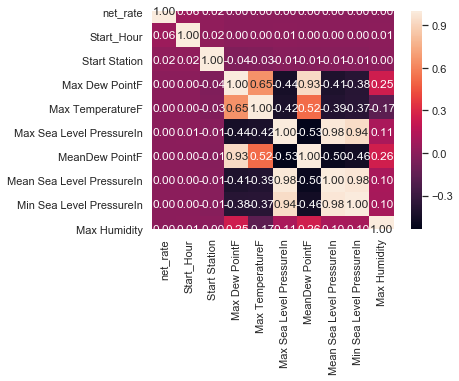

In [145]:
correlation_map = np.corrcoef(trip_weather_df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

### Now taking the X and Y variables from the dataset and getting an 80:20 ratio for train and test purpose

In [148]:
X = trip_weather_df[columns]
Y = X['net_rate'].values
X = X.drop('net_rate', axis = 1).values

In [149]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [151]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))


In [153]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -14.889759 (0.761749)
ScaledLASSO: -14.954173 (0.776976)
ScaledEN: -14.954173 (0.776976)
ScaledKNN: -14.521966 (0.709051)
ScaledCART: -13.634908 (0.416768)
ScaledGBM: -10.354387 (0.489512)


### It looks like Gradient boosting is giving the best results. Now GBM will be tested with few n_estimators using the GridSearchCV function.

In [154]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-11.192179 (0.518563) with: {'n_estimators': 50}
-10.354385 (0.489509) with: {'n_estimators': 100}
-9.309282 (0.480760) with: {'n_estimators': 200}
-8.704728 (0.462412) with: {'n_estimators': 300}
-8.279448 (0.401833) with: {'n_estimators': 400}
Best: -8.279448 using {'n_estimators': 400}


### It shows that 400 number of estimators gave the best results, so we will proceed and finalize the model with 400 estimators

In [156]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

8.15816488855052


In [157]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,0.273817,0
1,-3.749142,0
2,0.043083,-1
3,2.222893,2
4,3.505858,6
5,-0.032586,1
6,0.431679,-2
7,-0.034523,1
8,0.025855,-2
9,1.003449,0


In [158]:
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)

,Test Data,Predicted Price,Difference
0,1,1,0
1,1,0,0
2,0,1,0
3,7,9,1
4,403,33,370


### Could have improved the model by improving the feature selection, but with the time crunch, was not able to. Also could have improved the EDA and visualizations for a cleaner view.